In [1]:
import caffe
caffe.set_mode_cpu()
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

In Caffe models get specified in separate protobuf files.


Additionally a solver has to be specified, that determines training parameters.

Instantiate the solver and train the network.

In [3]:
solver = caffe.SGDSolver('mnist_solver.prototxt')
solver.net.forward()

{'loss': array(2.3025808334350586, dtype=float32)}

In [8]:
niter = 2500
test_interval = 100
# losses will also be stored in the log
train_loss = np.zeros(niter)
test_acc = np.zeros(int(np.ceil(niter / test_interval)))
output = np.zeros((niter, 8, 10))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    solver.test_nets[0].forward(start='conv2d_1')
    output[it] = solver.test_nets[0].blobs['dense_2'].data[:8]
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        print ('Iteration', it, 'testing...')
        correct = 0
        test_iter = 100
        for test_it in range(test_iter):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['dense_2'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / (64 * test_iter)

Iteration 0 testing...
Iteration 100 testing...
Iteration 200 testing...
Iteration 300 testing...
Iteration 400 testing...
Iteration 500 testing...
Iteration 600 testing...
Iteration 700 testing...
Iteration 800 testing...
Iteration 900 testing...
Iteration 1000 testing...
Iteration 1100 testing...
Iteration 1200 testing...
Iteration 1300 testing...
Iteration 1400 testing...
Iteration 1500 testing...
Iteration 1600 testing...
Iteration 1700 testing...
Iteration 1800 testing...
Iteration 1900 testing...
Iteration 2000 testing...
Iteration 2100 testing...
Iteration 2200 testing...
Iteration 2300 testing...
Iteration 2400 testing...


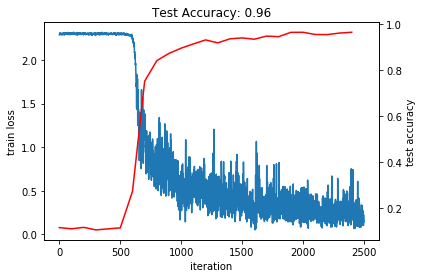

In [9]:
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))

The weights are saved in a `.caffemodel` file.

In [11]:
solver.net.save('mnist.caffemodel')